<a href="https://colab.research.google.com/github/shubshub-bol/Batch021/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Flight Price Prediction</strong></p>

In [235]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')


# Importing dataset
1.Since data is in form of excel file we have to use pandas read_excel to load the data.   
2.After loading it is important to check null values in a column or a row           
3.If it is present then following can be done,                                                                                   
*       Filling NaN values with mean, median and mode using fillna() method                                                           
*       If Less missing values, we can drop it as well           

In [311]:
#importing data
df=pd.read_excel('/content/Flight_Fare.xlsx')
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [314]:
 # creating it for future use case
 df2=df
 df3=df

In [313]:
#information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [239]:
#describe about the data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [240]:
df.shape

(10683, 11)

In [241]:
#finding the null values
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


### **We observe 2 missing values,So directly drop these as these are very less.**

In [242]:
#drop the nullvalues
df.dropna(inplace=True)

In [243]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


<a id = '5.5'></a>
<p style = "font-size : 25px; color : 'blue' ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Data Cleaning</strong></p>

In [244]:
# datatypes
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


#### The datatypes of Date_of_journey,Arrival_Time and Dep_Time is object.So,firstly we convert it into date and time for proper predicion.

**dt.day method will extract only day of that date                           
dt.month method will extract only month of that date**

In [245]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [246]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [247]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [248]:
df.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


##### Now ,we extract day and month from Date_of_journey and stored in 2 other columns.
##### Then there will be no use of 'Date_of_Journey' column,so we drop it.

In [249]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month


In [250]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-08-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-08-13 05:50:00,2025-08-13 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-08-13 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-08-13 18:05:00,2025-08-13 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-08-13 16:50:00,2025-08-13 21:35:00,4h 45m,1 stop,No info,13302,1,3
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2025-08-13 09:00:00,2025-08-13 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,2025-08-13 18:55:00,2025-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,12,3
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,2025-08-13 08:00:00,2025-03-02 05:05:00,21h 5m,1 stop,No info,22270,1,3
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,2025-08-13 08:55:00,2025-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,12,3
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2025-08-13 11:25:00,2025-08-13 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [251]:
df.drop('Date_of_Journey', axis=1, inplace=True)

##### From Arrival_time and Dept_time features,we extract hour and minutes and stored in new columns and drop these columns

In [252]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour

def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute


def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [253]:
#call the function
# Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [254]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [255]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


##### Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [256]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [257]:
df['Duration']=duration

In [258]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [259]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]



In [260]:
df['dur_hour']=df['Duration'].apply(hour)

In [261]:
df['dur_min']=df['Duration'].apply(minutes)

In [262]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15,7,50


In [263]:
drop_col(df,'Duration')

In [264]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Route,object
Total_Stops,object
Additional_Info,object
Price,int64
journey_day,int32
journey_month,int32
Dep_Time_hour,int32


In [265]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [266]:
df.dtypes

,0
Airline,object
Source,object
Destination,object
Route,object
Total_Stops,object
Additional_Info,object
Price,int64
journey_day,int32
journey_month,int32
Dep_Time_hour,int32


#### Finding the categorical value

## Airline vs Price Analysis

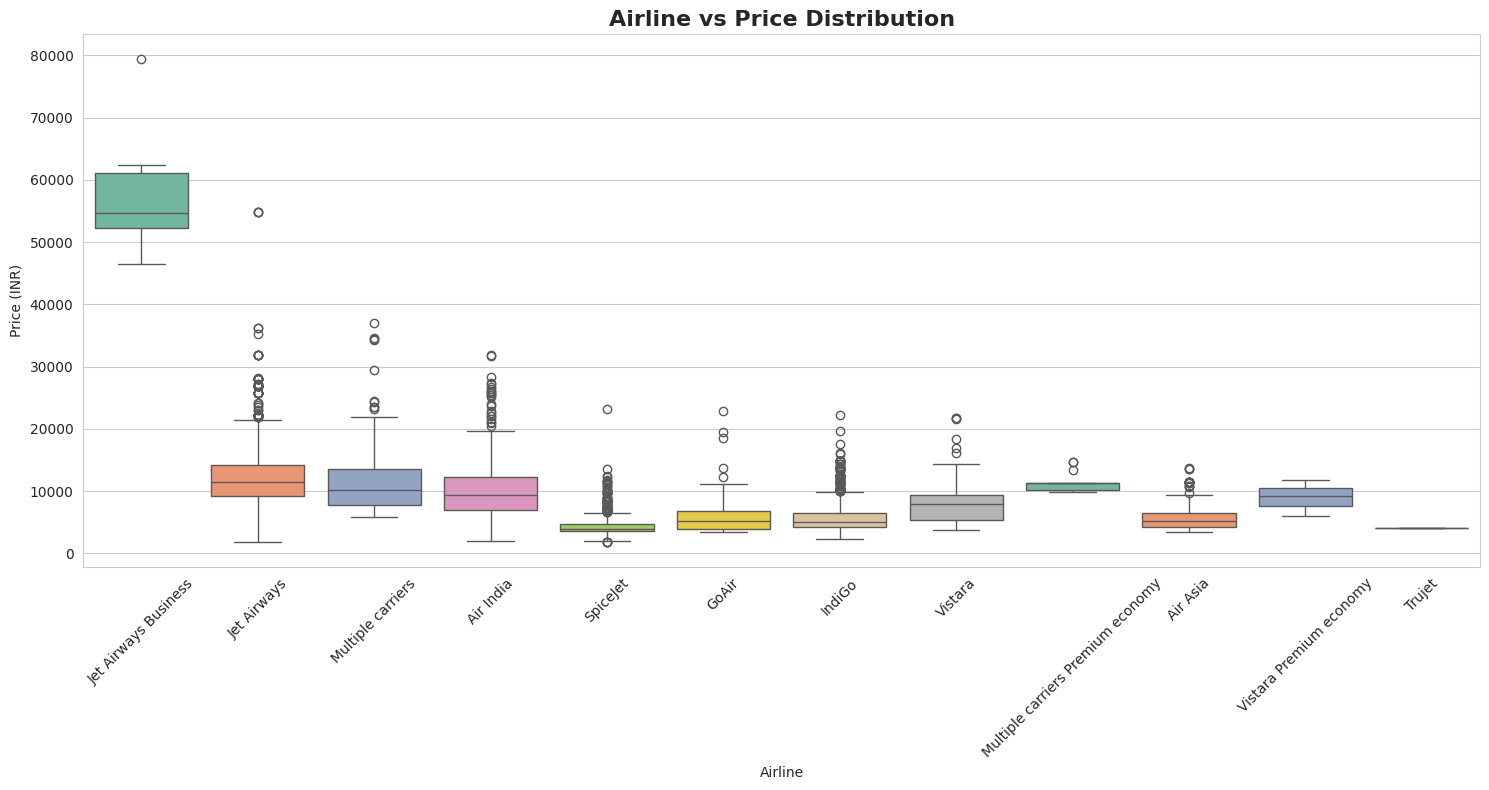

In [267]:
plt.figure(figsize=(15, 8))
sns.boxplot(
    x='Airline',
    y='Price',
    data=df.sort_values('Price', ascending=False),
    palette='Set2'  # Try 'Set2', 'husl', 'coolwarm', 'Spectral', etc.
)

plt.title("Airline vs Price Distribution", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("Price (INR)")
plt.xlabel("Airline")
plt.tight_layout()
plt.show()



### From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

#### Perform Total_Stops vs Price Analysis

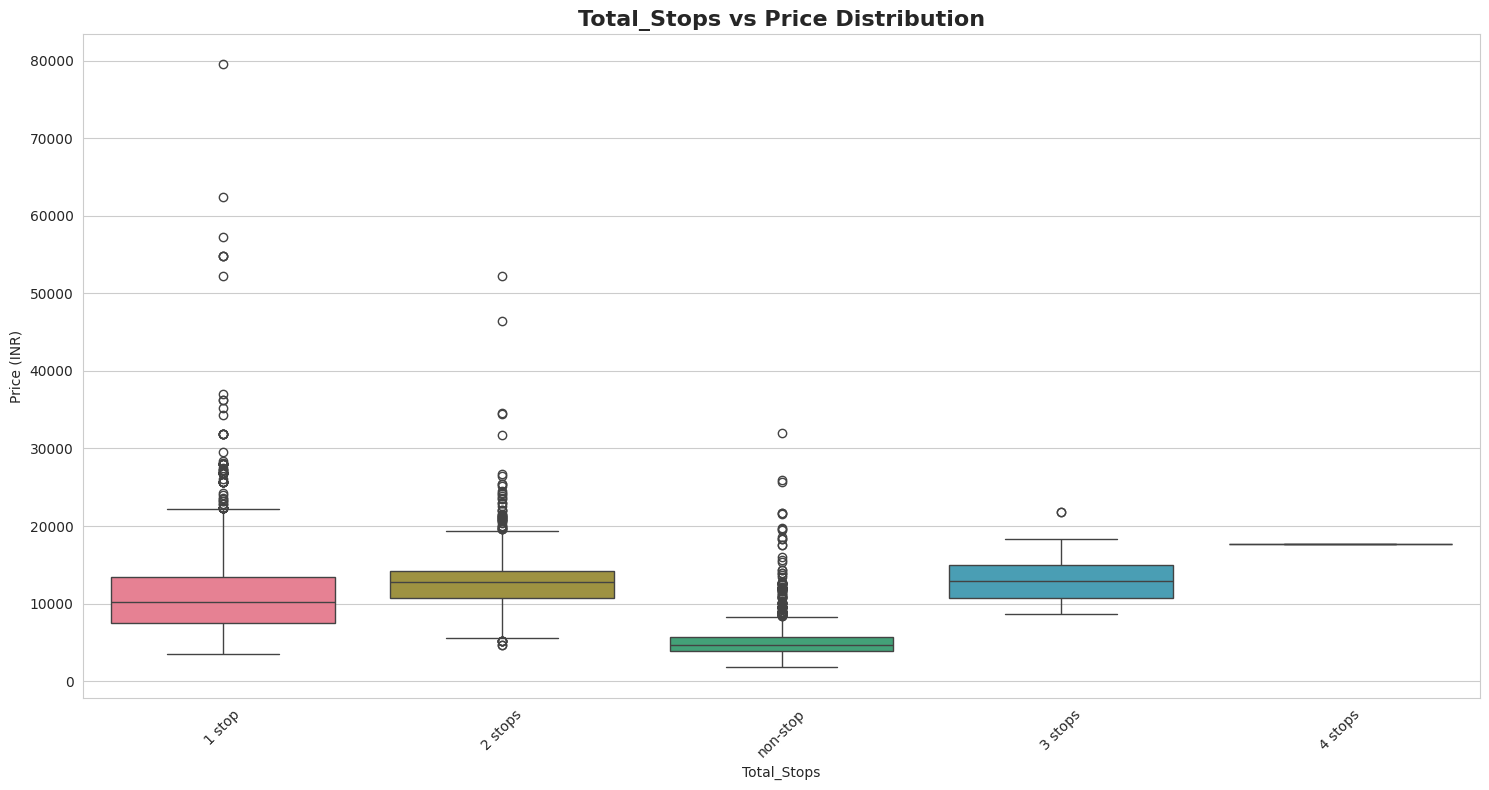

In [268]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False),palette='husl' )
plt.title("Total_Stops vs Price Distribution", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("Price (INR)")
plt.xlabel("Total_Stops")
plt.tight_layout()
plt.show()

# Handling categorical data




### We are using two main Encoding Techniques to covert Categorical data into some numerical format

#### Nominal data -- Data that are not in any order -->one hot encoding
#### ordinal data -- Data are in order --> labelEncoder

In [269]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(df['Airline'],drop_first=True)

In [270]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [271]:
df2

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


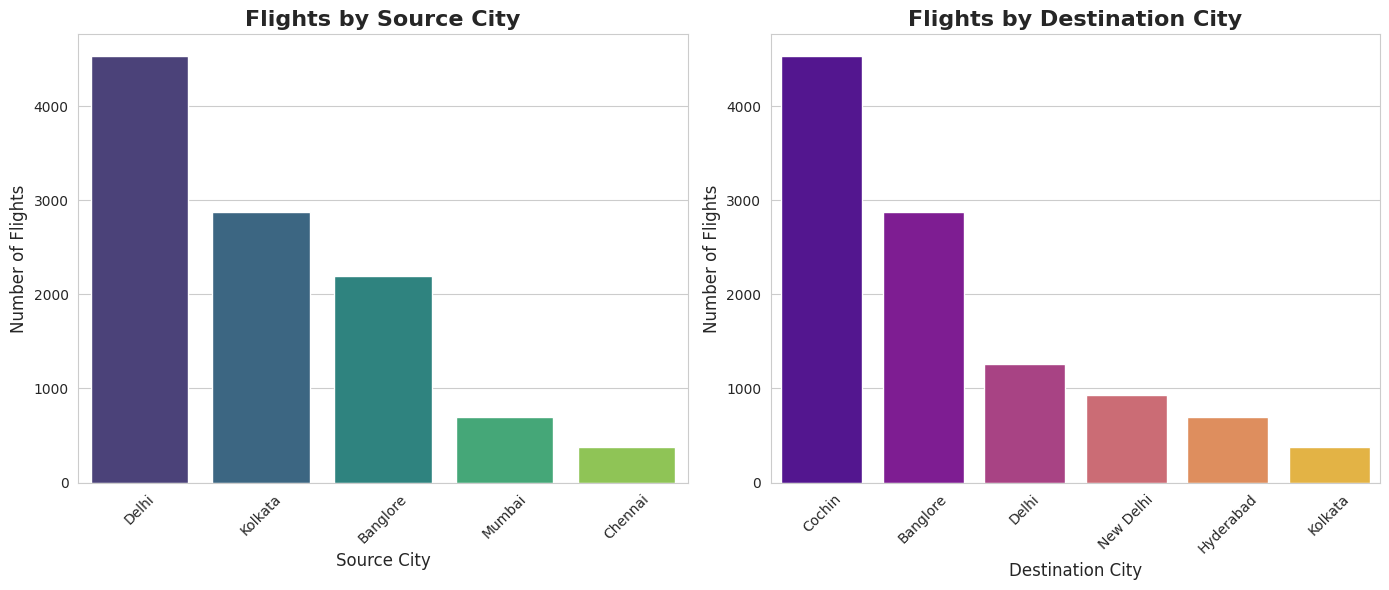

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

# Value counts for Source and Destination
source_counts = df2['Source'].value_counts()
destination_counts = df2['Destination'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Style settings
sns.set_style("whitegrid")
palette_src = sns.color_palette("viridis", len(source_counts))
palette_dest = sns.color_palette("plasma", len(destination_counts))

# Source plot
sns.barplot(x=source_counts.index, y=source_counts.values, palette=palette_src, ax=axes[0])
axes[0].set_title('Flights by Source City', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Source City', fontsize=12)
axes[0].set_ylabel('Number of Flights', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Destination plot
sns.barplot(x=destination_counts.index, y=destination_counts.values, palette=palette_dest, ax=axes[1])
axes[1].set_title('Flights by Destination City', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Destination City', fontsize=12)
axes[1].set_ylabel('Number of Flights', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Layout
plt.tight_layout()
plt.show()


In [273]:
#encoding of source column
source=pd.get_dummies(df['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


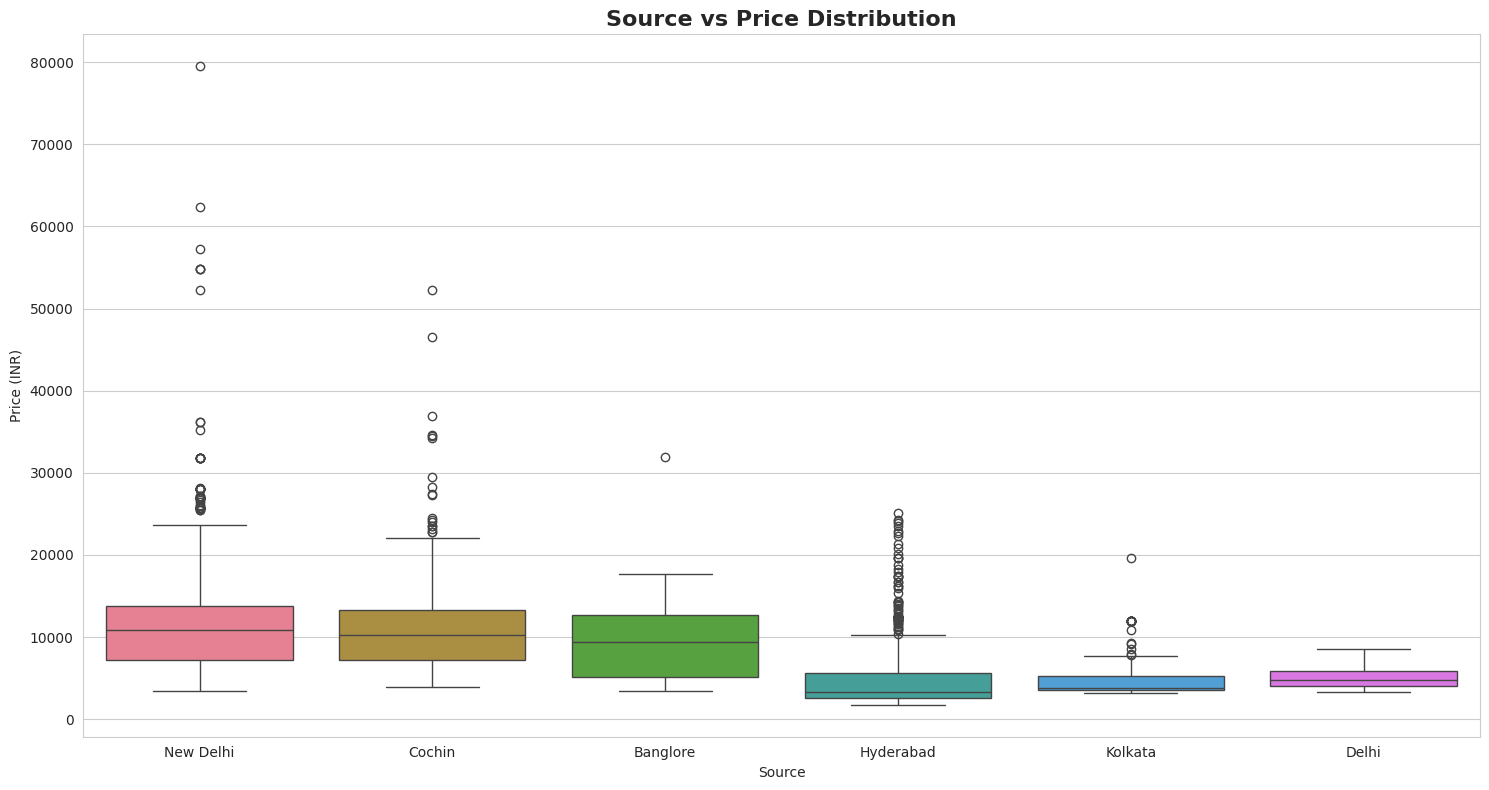

In [274]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False),palette='husl')
plt.title("Source vs Price Distribution", fontsize=16, fontweight='bold')
plt.ylabel("Price (INR)")
plt.xlabel("Source")
plt.tight_layout()
plt.show()

In [275]:
#encoding of destination column
destination=pd.get_dummies(df['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [276]:
# now work on route column
df['Route'].value_counts()


,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1552
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
...,...
BOM → VNS → DEL → HYD,1
BLR → HBX → BOM → NAG → DEL,1
BLR → BOM → IXC → DEL,1


In [277]:
df['Route1'] = df['Route'].str.split('→').str[0]
df['Route2'] = df['Route'].str.split('→').str[1]
df['Route3'] = df['Route'].str.split('→').str[2]
df['Route4'] = df['Route'].str.split('→').str[3]
df['Route5'] = df['Route'].str.split('→').str[4]


In [278]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,BLR,NAG,DEL,NaN,NaN


In [279]:
drop_col(df,'Route')

In [280]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,19,55,22,25,2,30,CCU,BLR,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,20,45,23,20,2,35,CCU,BLR,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,8,20,11,20,3,0,BLR,DEL,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,11,30,14,10,2,40,BLR,DEL,NaN,NaN,NaN


In [281]:
df.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Total_Stops,0
Additional_Info,0
Price,0
journey_day,0
journey_month,0
Dep_Time_hour,0
Dep_Time_min,0


In [282]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'journey_day', 'journey_month', 'Dep_Time_hour',
       'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min', 'dur_hour',
       'dur_min', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [283]:
for i in ['Route3', 'Route4', 'Route5']:
    df[i].fillna('None',inplace=True)

In [284]:
df.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Total_Stops,0
Additional_Info,0
Price,0
journey_day,0
journey_month,0
Dep_Time_hour,0
Dep_Time_min,0


In [285]:
for i in df.columns:
    print('{} has total {} categories'.format(i,len(df[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Price has total 1870 categories
journey_day has total 10 categories
journey_month has total 4 categories
Dep_Time_hour has total 24 categories
Dep_Time_min has total 12 categories
Arrival_Time_hour has total 24 categories
Arrival_Time_min has total 12 categories
dur_hour has total 44 categories
dur_min has total 12 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


In [286]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [287]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    df[i]=encoder.fit_transform(df[i])

In [288]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45,0,34,8,13,5


In [289]:
drop_col(df,'Additional_Info')

In [290]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [291]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
df['Total_Stops']=df['Total_Stops'].map(dict)

In [292]:
df['Total_Stops']


,Total_Stops
0,0
1,2
2,2
3,1
4,1
...,...
10678,0
10679,0
10680,0
10681,0


In [293]:
drop_col(df,'Source')
drop_col(df,'Destination')
drop_col(df,'Airline')

<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>After all preprocessing, Our data is ready for the modeling</strong></p>



```
# This is formatted as code
```

final_df=pd.concat([df,Airline,source,destination,df[continuous_col]],axis=1)

In [294]:
final_df=pd.concat([df,Airline,source,destination],axis=1)

In [295]:
final_df.head()

,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,Route1,Route2,Route3,Route4,Route5,Air India,...,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,13,29,13,5,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,2,25,1,3,5,True,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,3,32,4,5,5,False,...,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,2,34,3,13,5,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,0,34,8,13,5,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [296]:
pd.set_option('display.max_columns',33)
final_df.head()

,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,Route1,Route2,Route3,Route4,Route5,Air India,...,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,13,29,13,5,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,2,25,1,3,5,True,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,3,32,4,5,5,False,...,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,2,34,3,13,5,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,0,34,8,13,5,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


## Check For Outliers


In [297]:
def plot(data, col):
    # Set style
    sns.set_style("whitegrid")

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

    # Distribution plot
    sns.histplot(data[col], kde=True, color='skyblue', ax=ax1)
    ax1.set_title(f"Distribution of {col}", fontsize=16, fontweight='bold')
    ax1.set_xlabel("")
    ax1.set_ylabel("Frequency")

    # Box plot
    sns.boxplot(x=data[col], ax=ax2, palette="Set2")
    ax2.set_title(f"Boxplot of {col}", fontsize=16, fontweight='bold')
    ax2.set_xlabel(col)

    # Adjust layout
    plt.tight_layout()
    plt.show()


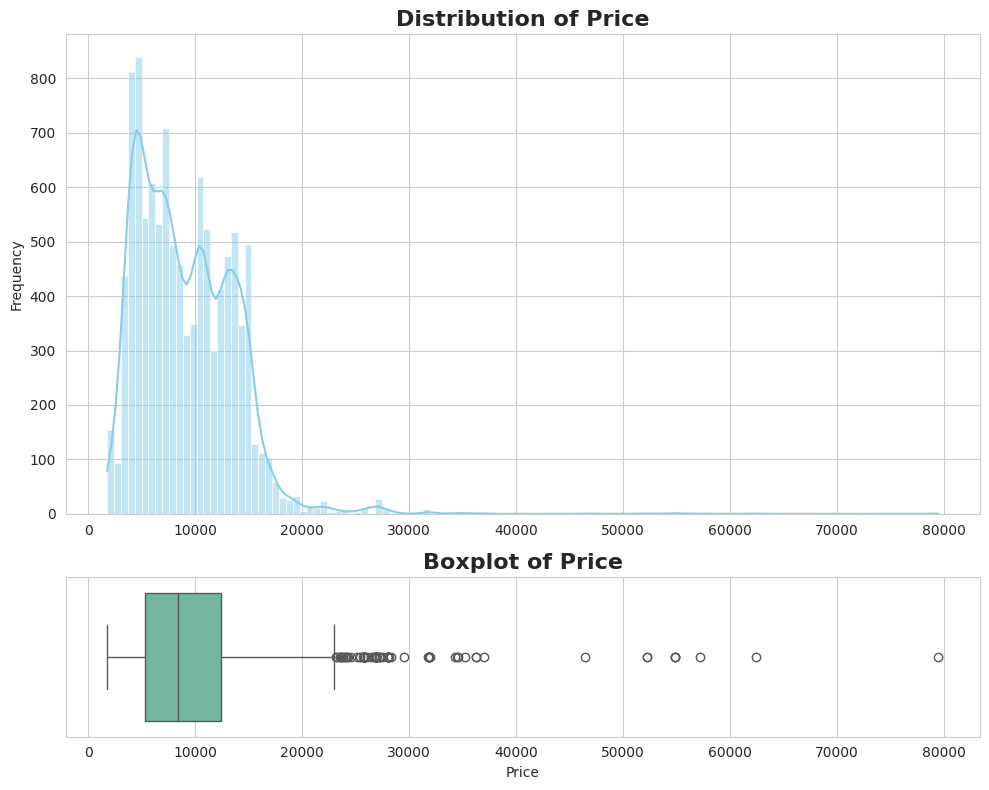

In [298]:
plot(final_df,'Price')

###  Handling outliers:
#### As there is some outliers in price feature,so we replace it  with median.

In [299]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

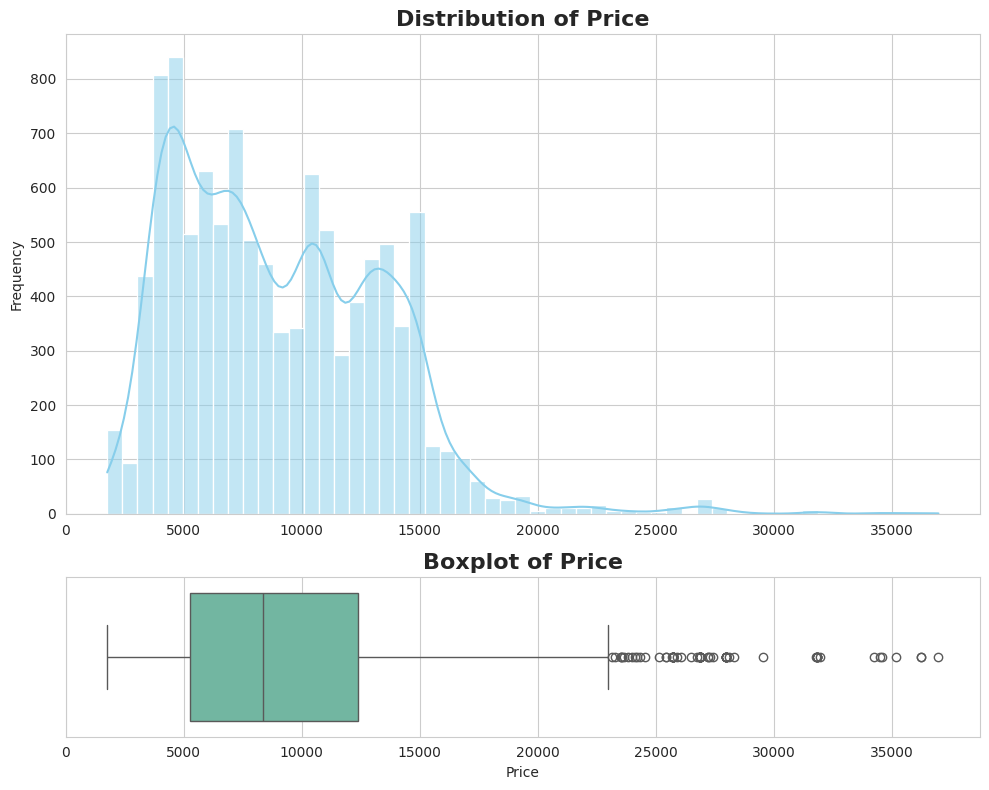

In [300]:
plot(final_df,'Price')

### Seprate the dataset in X and Y columns

In [301]:
X=final_df.drop('Price',axis=1)
y=df['Price']

# Feature Selection
It is about finding the best feature and having good relation with independent variable                                  
Issue of dimensionality reduction reduces.

For this we use mutual_info_classif

In [302]:
from sklearn.feature_selection import mutual_info_classif


In [303]:
mutual_info_classif(X,y)

array([1.91536483, 0.89801485, 1.67847607, 1.52383394, 1.25337607,
       1.91356973, 1.62998929, 1.79310975, 1.14595422, 2.32053535,
       2.98125495, 2.57140804, 1.79059757, 1.50458318, 0.68059978,
       0.09361171, 0.63313243, 0.87628272, 0.00576385, 0.54410365,
       0.01213652, 0.31418706, 0.        , 0.21442176, 0.        ,
       0.16416116, 1.34537186, 0.80078278, 0.28497132, 1.36137033,
       0.39810292, 0.28093573, 0.17569422, 0.35024144])

In [304]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,1.881378
journey_day,0.896415
journey_month,1.632748
Dep_Time_hour,1.511744
Dep_Time_min,1.269593
Arrival_Time_hour,1.927085
Arrival_Time_min,1.583481
dur_hour,1.779695
dur_min,1.150414
Route1,2.335940


In [305]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route2,2.976417
Route3,2.551240
Route1,2.335940
Arrival_Time_hour,1.927085
Total_Stops,1.881378
dur_hour,1.779695
Route4,1.678327
journey_month,1.632748
Arrival_Time_min,1.583481
Dep_Time_hour,1.511744


As we can see from the table, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing it.

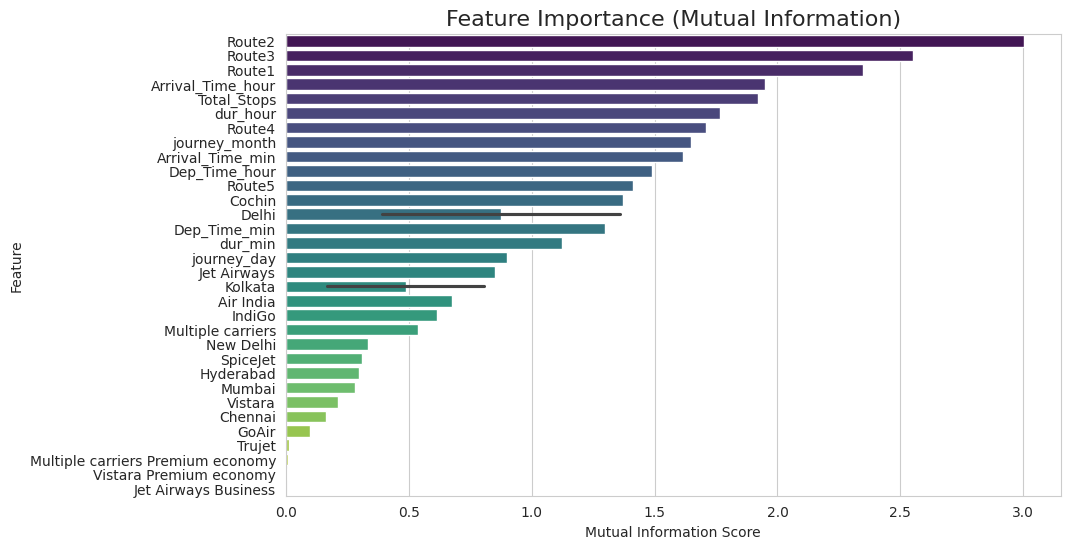

In [306]:
# Calculate MI scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Create DataFrame
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='MI Score', y='Feature', data=mi_df, palette='viridis')
plt.title('Feature Importance (Mutual Information)', fontsize=16)
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.show()

 * Top Features

Route2, Route3, and Route1 dominate the list.
→ This means the middle legs of the journey carry the most predictive power for ticket price. Probably because connecting airports affect cost significantly.

Total_Stops also ranks very high, which makes sense since more stops generally mean cheaper fares (low-cost carriers) or sometimes higher (due to long-haul complexity).

* Timing Features

Arrival_Time_hour and Dep_Time_hour have strong importance.
→ Certain times of day are likely in higher demand (e.g., early morning or evening peak flights).

Duration-related features (dur_hour, dur_min) also matter, reflecting the relationship between travel time and cost.

* Date-based Features

journey_month ranks higher than journey_day, meaning month-based seasonality influences fares more than specific days of the month.
(e.g., holiday seasons, summer breaks, etc.)

* Low-Importance Features

Specific airlines like GoAir, Trujet, and premium-class indicators have low mutual information.
→ Could be because their presence in the dataset is rare or because airline brand is less predictive than route/timing.



In [308]:
df2

,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min,Route1,Route2,Route3,Route4,Route5
0,0,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,2,7662,1,5,5,50,13,15,7,25,2,25,1,3,5
2,2,13882,9,6,9,25,4,25,19,0,3,32,4,5,5
3,1,6218,12,5,18,5,23,30,5,25,2,34,3,13,5
4,1,13302,1,3,16,50,21,35,4,45,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,2,5,29,13,5
10679,0,4145,27,4,20,45,23,20,2,35,2,5,29,13,5
10680,0,7229,27,4,8,20,11,20,3,0,0,13,29,13,5
10681,0,12648,1,3,11,30,14,10,2,40,0,13,29,13,5


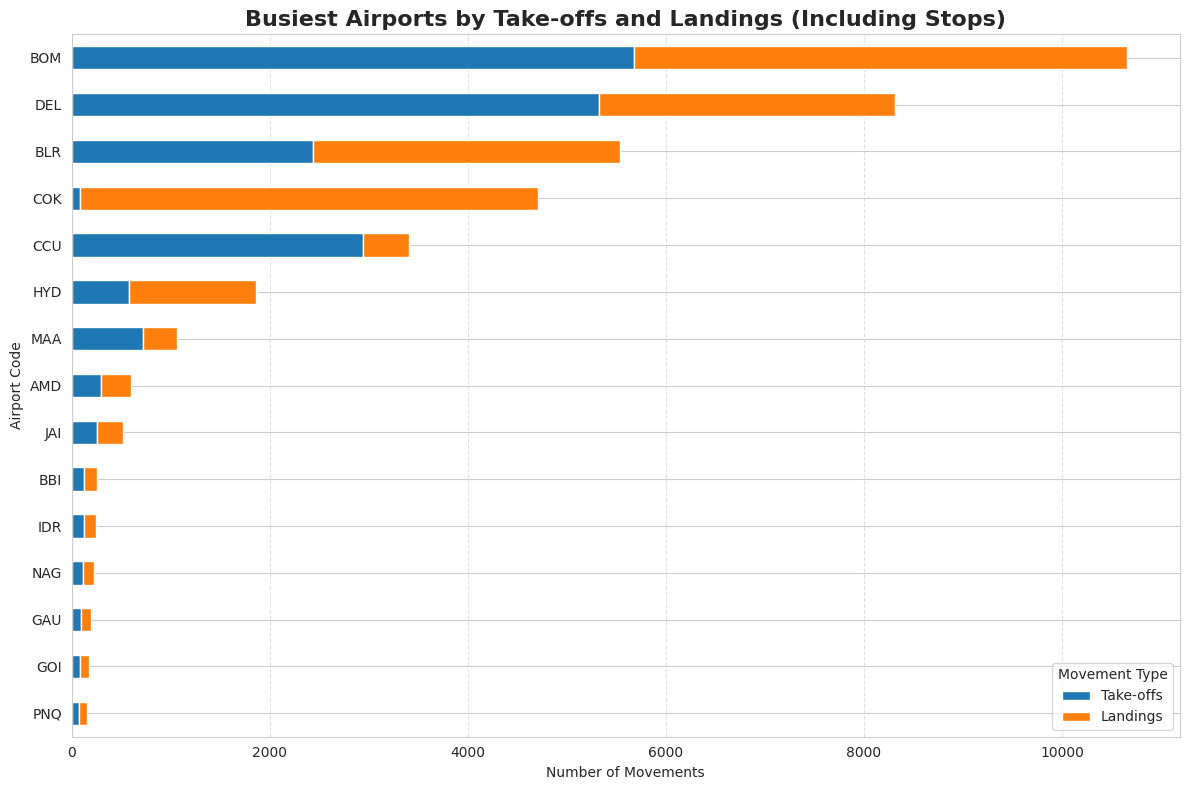

In [315]:
import pandas as pd
import matplotlib.pyplot as plt

# Helper: split route into list of airports
def split_airports(route):
    if pd.isna(route):  # Skip if NaN
        return []
    return [x.strip() for x in str(route).split('→')]

# Count take-offs and landings
take_off_counts = {}
landing_counts = {}

for route in df3['Route']:
    airports = split_airports(route)
    if not airports:  # Skip empty
        continue

    # First airport = take-off
    take_off_counts[airports[0]] = take_off_counts.get(airports[0], 0) + 1

    # Last airport = landing
    landing_counts[airports[-1]] = landing_counts.get(airports[-1], 0) + 1

    # Intermediate hops: each stop has a landing then a take-off
    for i in range(1, len(airports) - 1):
        landing_counts[airports[i]] = landing_counts.get(airports[i], 0) + 1
        take_off_counts[airports[i]] = take_off_counts.get(airports[i], 0) + 1

# Merge into one DataFrame
airports_df = pd.DataFrame({
    'Take-offs': pd.Series(take_off_counts),
    'Landings': pd.Series(landing_counts)
}).fillna(0)

airports_df['Total Movements'] = airports_df['Take-offs'] + airports_df['Landings']
airports_df = airports_df.sort_values('Total Movements', ascending=False)

# Plot
airports_df.head(15)[['Take-offs', 'Landings']].plot(
    kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(12, 8)
)

plt.title('Busiest Airports by Take-offs and Landings (Including Stops)', fontsize=16, weight='bold')
plt.xlabel('Number of Movements')
plt.ylabel('Airport Code')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title='Movement Type')
plt.tight_layout()
plt.show()


| IATA Code | Full Airport Name                                                                         |
| --------- | ----------------------------------------------------------------------------------------- |
| **BOM**   | Chhatrapati Shivaji Maharaj International Airport — Mumbai         |
| **DEL**   | Indira Gandhi International Airport — Delhi
| **BLR**   | Kempegowda International Airport — Bengaluru
| **COK**   | Cochin International Airport — Kochi
| **CCU**   | Netaji Subhas Chandra Bose International Airport — Kolkata
| **HYD**   | Rajiv Gandhi International Airport — Hyderabad\
| **MAA**   | Chennai International Airport — Chennai
| **AMD**   | Sardar Vallabhbhai Patel International Airport — Ahmedabad
| **JAI**   | Jaipur International Airport — Jaipur
| **BBI**   | Biju Patnaik International Airport — Bhubaneswar
| **NAG**   | Dr. Babasaheb Ambedkar International Airport — Nagpur
| **GAU**   | Lokpriya Gopinath Bordoloi International Airport — Guwahati
| **GOI**   | Goa International Airport (Dabolim) — Goa
| **PNQ**   | Pune Airport — Pune           |
| **IDR**   | Devi Ahilya Bai Holkar Airport — Indore



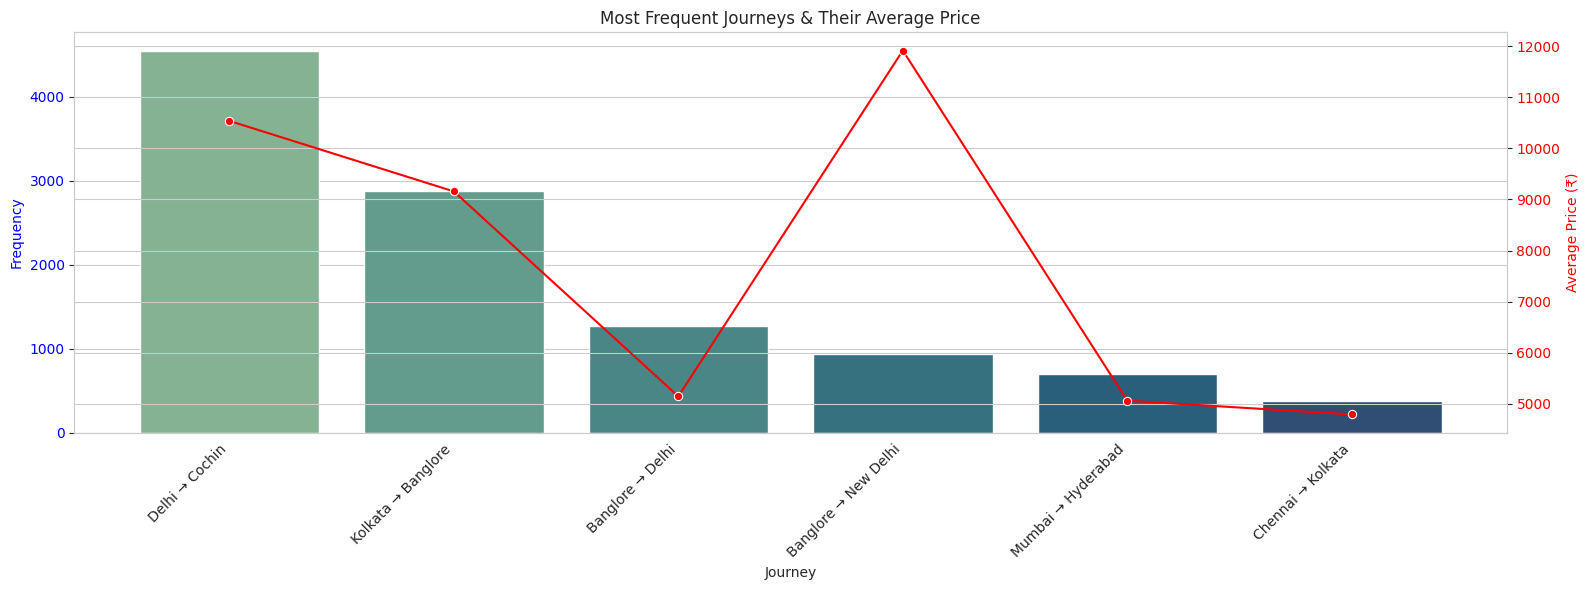

In [316]:
# Create a journey column
df2['Journey'] = df2['Source'] + " → " + df2['Destination']

# Group by journey for count and average price
journey_stats = df2.groupby('Journey').agg(
    Frequency=('Journey', 'size'),
    Avg_Price=('Price', 'mean')
).reset_index()

# Sort by frequency
journey_stats = journey_stats.sort_values(by='Frequency', ascending=False).head(10)

# Plot
fig, ax1 = plt.subplots(figsize=(16,6))

# Bar plot for frequency
sns.barplot(data=journey_stats, x='Journey', y='Frequency', palette='crest', ax=ax1)
ax1.set_ylabel('Frequency', color='b')
ax1.set_xlabel('Journey')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Secondary axis for average price
ax2 = ax1.twinx()
sns.lineplot(data=journey_stats, x='Journey', y='Avg_Price', marker='o', color='r', ax=ax2)
ax2.set_ylabel('Average Price (₹)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("Most Frequent Journeys & Their Average Price")
plt.tight_layout()
plt.show()


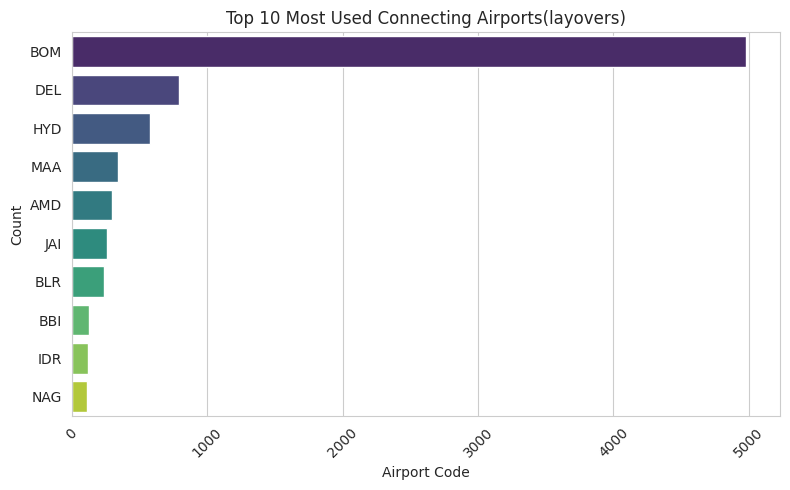

In [317]:

from collections import Counter


# Remove NaN and split routes
all_stops = df2['Route'].dropna().apply(lambda x: x.split(' → '))

# Count intermediate stops
connecting_airports = Counter()
for route in all_stops:
    if len(route) > 2:  # has at least 1 connecting airport
        connecting_airports.update(route[1:-1])

# Create dataframe of top 10
top_connecting = connecting_airports.most_common(10)
connecting_df = pd.DataFrame(top_connecting, columns=['Airport', 'Count'])

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=connecting_df, x='Count', y='Airport', palette='viridis')
plt.title("Top 10 Most Used Connecting Airports(layovers)")
plt.xlabel("Airport Code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Insight & Opportunity:**  

Data shows **BOM (Mumbai)** is by far the most used connecting airport, followed by DEL, HYD, and others.  
Because of layovers, these airports have more advantage in restaurant-related businesses, cafés, and other F&B outlets, as passengers often have idle time.

**Additional Revenue Stream:**

Installing **self-service vending machines** at these top layover hubs—especially BOM—can tap into heavy foot traffic from transfer passengers.

**Product Mix:**  
- **Travel essentials:** chargers, earphones, neck pillows, SIM cards  
- **Snacks & drinks:** bottled water, coffee cans, energy bars  
- **Local souvenirs:** packaged sweets, small handicrafts  

**Why it works:**  
High layover volumes + limited time between flights = strong demand for quick, convenient purchases and food options.  
Low staffing needs make vending scalable across airports.

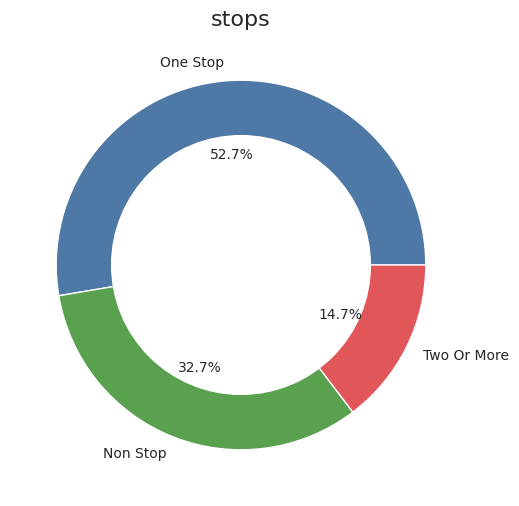

In [318]:
# Example stop counts (replace these with your actual data counts)
stop_counts = [
    (df['Total_Stops'] == '1 stop').sum(),          # One Stop
    (df['Total_Stops'] == 'non-stop').sum(),        # Zero Stops
    (df['Total_Stops'].isin(['2 stops', '3 stops'])).sum()  # Two Or More
]

labels = ['One Stop', 'Non Stop', 'Two Or More']
colors = ['#4e79a7', '#59a14f', '#e15759']

# Donut chart
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    stop_counts,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops={'width': 0.4}
)

# Add center circle
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))

plt.title("stops", fontsize=16)
plt.show()

# Models

In [319]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [320]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions)
    print("r2 score is: {}".format(r2score))

    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

    sns.distplot(y_test-predictions)


In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor


Model is: RandomForestRegressor()
Training score: 0.9532552770679337
Predictions are: [ 8579.195      17182.8        13574.79266667 ...  3804.62
  5623.93       10753.73083333]


r2 score is: 0.8435366446952657
MAE:1083.5091514740782
MSE:3012807.9188182433
RMSE:1735.7441974030169


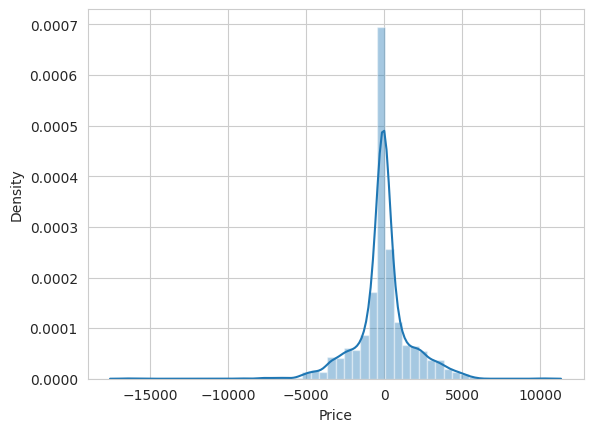

In [322]:

predict(RandomForestRegressor())

Model is: LogisticRegression()
Training score: 0.347571679344646
Predictions are: [14781 15237 10844 ...  4226  7888 10262]


r2 score is: 0.39270049642521876
MAE:1925.012634534394
MSE:11693963.41974731
RMSE:3419.643756262823


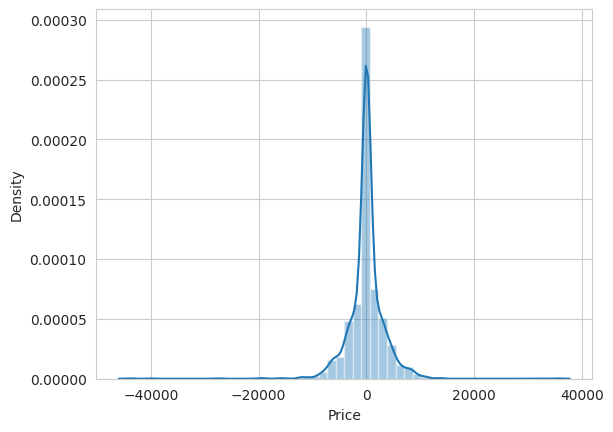

In [323]:
predict(LogisticRegression())



Model is: KNeighborsRegressor()
Training score: 0.7503901683440375
Predictions are: [ 8355.4 16362.4 12933.2 ...  3757.   9073.  11232.4]


r2 score is: 0.6684907617962729
MAE:1646.9471221338324
MSE:6383434.997136173
RMSE:2526.546060758872


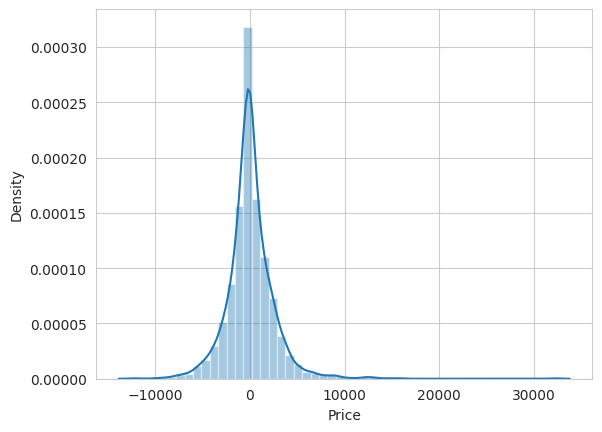

In [324]:
predict(KNeighborsRegressor())


Model is: DecisionTreeRegressor()
Training score: 0.9701124435927416
Predictions are: [ 8996. 18550. 14571. ...  3717.  6069. 10262.]


r2 score is: 0.7496147962201786
MAE:1203.6523943222587
MSE:4821336.74836219
RMSE:2195.7542550026383


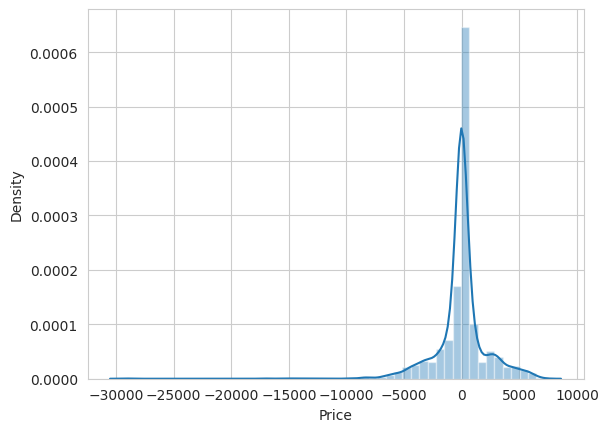

In [325]:
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: 0.03692168715331767
Predictions are: [8516.40489669 8265.65249704 8451.37570001 ... 8298.82178087 8460.32416591
 8545.25725503]


r2 score is: 0.0527698349034188
MAE:3326.758076720636
MSE:18239558.628844902
RMSE:4270.779627754739


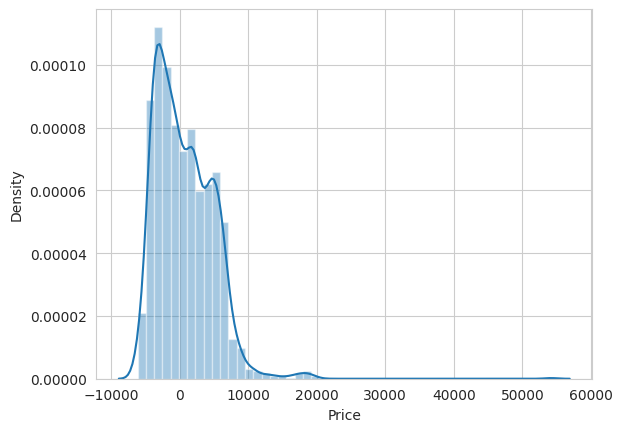

In [326]:
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 0.7876495878142001
Predictions are: [ 5452.58175724 17020.10179829 11968.38611281 ...  4151.08933122
  6682.83342558 11738.24600723]


r2 score is: 0.8050012845484131
MAE:1439.771983501889
MSE:3754832.388246437
RMSE:1937.7389886789285


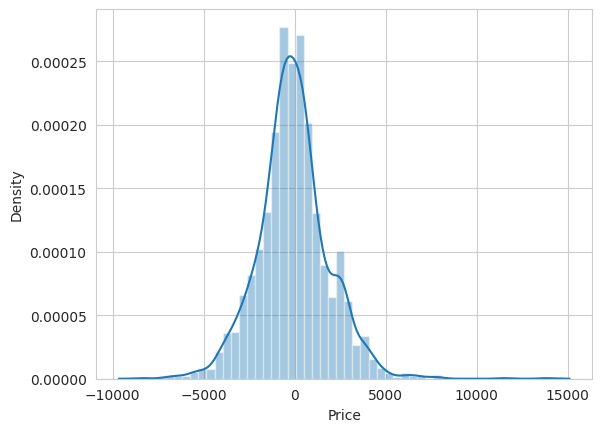

In [327]:
predict(GradientBoostingRegressor())

# Hypertunning the model

In [328]:
from sklearn.model_selection import RandomizedSearchCV


In [329]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [330]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 180, 'max_features': 'sqrt', 'max_depth': 15}

In [331]:
# best parameter
rf_random.best_params_

{'n_estimators': 180, 'max_features': 'sqrt', 'max_depth': 15}

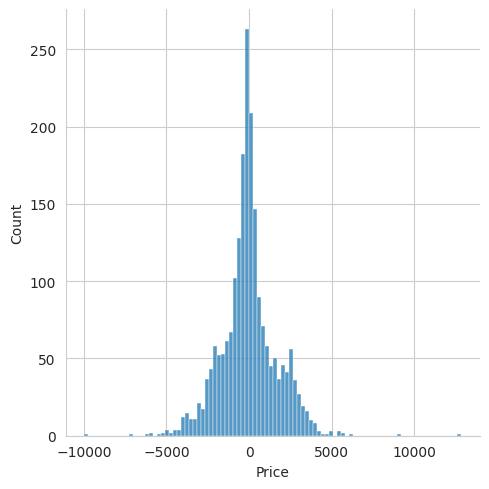

In [332]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [333]:
r2_score(y_test,prediction)

0.852611654231663

## After hypertuning,the accuracy increases .
